## Named-entity recognition

This chapter will introduce a slightly more advanced topic: named-entity recognition. You'll learn how to identify the who, what, and where of your texts using pre-trained models on English and non-English text. You'll also learn how to use some new libraries, polyglot and spaCy, to add to your NLP toolbox.

### Named-entity recognition(NER) with NLTK

You're now going to have some fun with named-entity recognition! A scraped news article has been pre-loaded into your workspace. Your task is to use nltk to find the named entities in this article.

What might the article be about, given the names you found?

In [17]:
article = """The taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, this use of it was not something the users had bargained for. Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company.


Uber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they tried to hire a driver, be given false reports about the location of its cars. Uber management booked and then cancelled rides with a rival taxi-hailing company which took their vehicles out of circulation. Uber deny this was the intention. The punishment for this behaviour was negligible. Uber promised not to use this “greyball” software against law enforcement – one wonders what would happen to someone carrying a knife who promised never to stab a policeman with it. Travis Kalanick of Uber got a personal dressing down from Tim Cook, who runs Apple, but the company did not prohibit the use of the app. Too much money was at stake for that.


Millions of people around the world value the cheapness and convenience of Uber’s rides too much to care about the lack of drivers’ rights or pay. Many of the users themselves are not much richer than the drivers. The “sharing economy” encourages the insecure and exploited to exploit others equally insecure to the profit of a tiny clique of billionaires. Silicon Valley’s culture seems hostile to humane and democratic values. The outgoing CEO of Yahoo, Marissa Mayer, who is widely judged to have been a failure, is likely to get a $186m payout. This may not be a cause for panic, any more than the previous hero worship should have been a cause for euphoria. Yet there’s an urgent political task to tame these companies, to ensure they are punished when they break the law, that they pay their taxes fairly and that they behave responsibly.
"""

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

# Tokenize the article into sentences: sentences
sentences = sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary = True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)




(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


### Charting practice

In this exercise, you'll use some extracted named entities and their groupings from a series of newspaper articles to chart the diversity of named entity types in the articles.

You'll use a `defaultdict` called `ner_categories`, with keys representing every named entity group type, and values to count the number of each different named entity type. You have a chunked sentence list called `chunked_sentences` similar to the last exercise, but this time with non-binary category names.

You can use `hasattr()` to determine if each chunk has a `'label'` and then simply use the chunk's `.label()` method as the dictionary key.

[2, 7, 1]
['GPE', 'PERSON', 'ORGANIZATION']


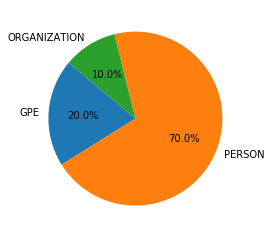

In [24]:
from collections import defaultdict
from matplotlib import pyplot as plt 
%matplotlib inline

# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary = False)

# Create the nested for loop
for sent in chunked_sentences:   
    for chunk in sent:
        if hasattr(chunk, 'label'):
            #print(chunk.label())
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]

print(values)

print(labels)

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()

### Comparing NLTK with spaCy NER

Using the same text you used in the first exercise of this chapter, you'll now see the results using spaCy's NER annotator. How will they compare?

To minimize execution times, you'll be asked to specify the keyword arguments tagger=False, parser=False, matcher=False when loading the spaCy model, because you only care about the entity in this exercise.

In [30]:
# Import spacy
import spacy

# Instantiate the English model: nlp
nlp = spacy.load('en', tagger=False, parser=False, matcher=False)

# Create a new document: doc
doc = nlp(article)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)


GPE unroll.me
GPE unroll.me
ORG Apple
ORG Uber
CARDINAL one
PERSON Travis Kalanick
GPE Uber
PERSON Tim Cook
ORG Apple
CARDINAL Millions
ORG Uber’s
LOC Silicon Valley’s
ORG Yahoo
PERSON Marissa Mayer
MONEY 186
